In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [83]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [14]:
calendar.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [11]:
listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [18]:
print(calendar.shape)
print(listings.shape)
print(reviews.shape)

(1308890, 4)
(3585, 95)
(68275, 6)


# Data Cleaning

In [24]:
reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

In [84]:
# remove columns where listing is 75% or more N/A in listings
listings_new = listings[listings.columns[listings.isnull().mean() < 0.75]]

In [44]:
listings_new.shape

(3585, 88)

In [85]:
# Remove any listings that are not currently available
calendar_available  = calendar.loc[calendar.available == 't']

In [80]:
calendar_available.isna().sum()

listing_id    0
date          0
available     0
price         0
year_month    0
dtype: int64

In [73]:
calendar_available.head()

,listing_id,date,available,price,year_month
365,3075044,2017-08-22,t,$65.00,2017-08
366,3075044,2017-08-21,t,$65.00,2017-08
367,3075044,2017-08-20,t,$65.00,2017-08
368,3075044,2017-08-19,t,$75.00,2017-08
369,3075044,2017-08-18,t,$75.00,2017-08


In [86]:
# Convert date into date-month
calendar_available['year_month']= pd.to_datetime(calendar_available['date'].str.strip(), format='%Y-%m-%d')
calendar_available['year_month'] = pd.to_datetime(calendar_available['year_month']).dt.to_period('M')

reviews['year_month']= pd.to_datetime(reviews['date'].str.strip(), format='%Y-%m-%d')
reviews['year_month'] = pd.to_datetime(reviews['year_month']).dt.to_period('M')


C:\Users\jlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
reviews['year'] = pd.DatetimeIndex(reviews['date']).year

In [88]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year_month,year
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2013-05,2013
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,2013-05,2013
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,2013-06,2013
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,2013-06,2013
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,2013-06,2013


In [151]:
# Convert Prices to float
listings['price'] = listings['price'].fillna(0.0).str.replace('[$,]', '').astype('float')
calendar_available['price'] = calendar_available['price'].fillna(0.0).str.replace('[$,]', '').astype('float')

C:\Users\jlee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Data Exploration

What are the most expensive locations in Boston and are there specific types of housing that are more expensive?

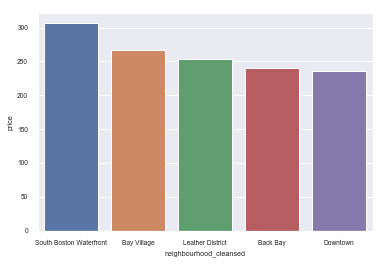

In [136]:

listings1 = listings.groupby(['neighbourhood_cleansed'],as_index=False)['price'].mean()
listings1 = listings1.sort_values('price', ascending = False)


rc={'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 12.0, 'axes.titlesize': 12}
sns.set(font_scale = .6)
sns.barplot(x='neighbourhood_cleansed', y='price', data=listings1.head());

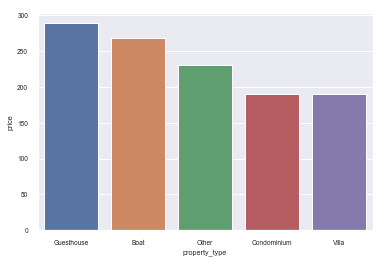

In [142]:
listings2 = listings.groupby(['property_type'],as_index=False)['price'].mean()
listings2 = listings2.sort_values('price', ascending = False)


rc={'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 12.0, 'axes.titlesize': 12}
sns.set(font_scale = .6)
sns.barplot(x='property_type', y='price', data=listings2.head());

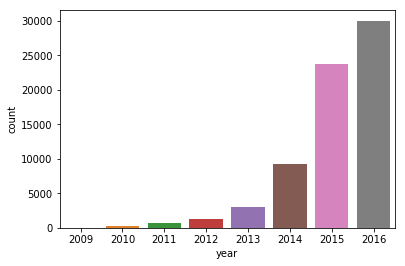

In [89]:
# Reviews have been growing every year

ax = sns.countplot(x="year", data=reviews)

2. What are the busiest times of the year to visit Boston? By how much do prices spike?

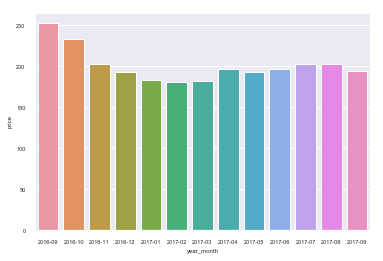

In [156]:
calendar_available1 = calendar_available.groupby(['year_month'],as_index=False)['price'].mean()
calendar_available2 = calendar_available1.sort_values('year_month', ascending = True)


rc={'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 10.0, 'axes.titlesize': 12}
sns.set(font_scale = .5)
sns.barplot(x='year_month', y='price', data=calendar_available2.head(15));



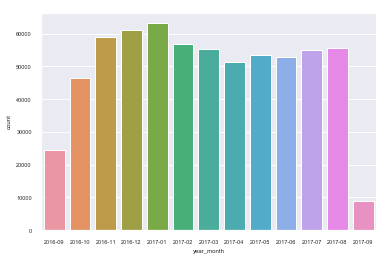

In [161]:
calendar_available1 = calendar_available.groupby(['year_month'],as_index=False)['price'].count()
calendar_available2 = calendar_available1.sort_values('year_month', ascending = True)
calendar_available2 = calendar_available1.rename(columns={"price": "count"})


rc={'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 10.0, 'axes.titlesize': 12}
sns.set(font_scale = .5)
sns.barplot(x='year_month', y='count', data=calendar_available2.head(15));


What are the best places to stay in Boston?

In [169]:
listings_new = listings.filter(['id','neighbourhood_cleansed','property_type','room_type','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])

In [176]:
listings_new1.describe()

,review_scores_rating
count,25.000000
mean,92.390341
std,2.382599
min,87.695122
25%,90.333333
50%,92.432203
75%,93.980392
max,98.333333


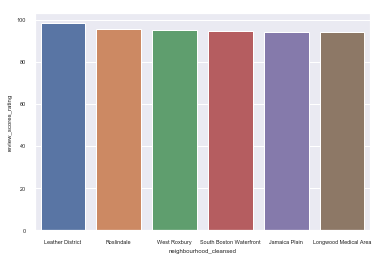

In [175]:
listings_new1 = listings_new.groupby(['neighbourhood_cleansed'],as_index=False)['review_scores_rating'].mean()
listings_new1 = listings_new1.sort_values('review_scores_rating', ascending = False)


rc={'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 10.0, 'axes.titlesize': 12}
sns.set(font_scale = .5)
sns.barplot(x='neighbourhood_cleansed', y='review_scores_rating', data=listings_new1.head(6));
